# Happy Costumer

Import necessary libraries for preprocessing and model training.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

Fix the random seed for the workflow

In [2]:
seed=1234
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Read the data from csv file using pandas.

In [5]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Data Analysis

array([[<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'X1'}>,
        <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'X6'}>, <Axes: >, <Axes: >]], dtype=object)

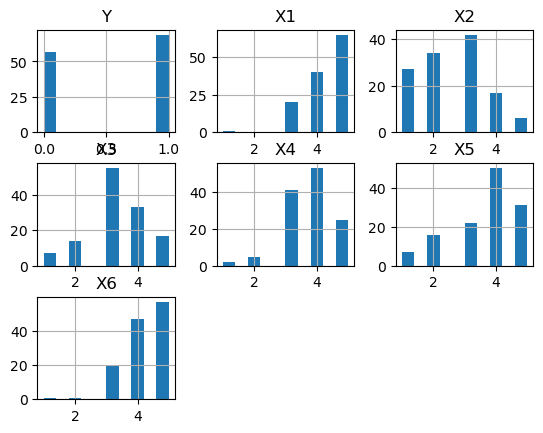

In [6]:
df.hist()

In [7]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


## Training Data

Here only first five questions are used as input features.

In [ ]:
input_column = ['X1', 'X2', 'X3', 'X4', 'X5']
X = df[input_column]
y = df['Y']

## Data Preprocessing

Use one hot enconding on the input variables.

In [4]:
drop_enc = OneHotEncoder(drop='first').fit(X)
X = drop_enc.transform(X)
X = X.toarray()

## Neural Netwrok Architecture

Define the architecture of the neural network model with the three layer of 'relu' activation followed by dropout layer, and a final layer with sigmoid activation function. 

In [5]:
model = Sequential()
model.add(Dense(100, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

Define the variables to compile the model.

In [6]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Training

Train the NN model on preprocessed data with 30% as validation data, 1000 as epochs and 10 as batch size.

In [7]:
history = model.fit(X, y, epochs=1000, batch_size=10, validation_split=0.3, shuffle=True, verbose=1)

Epoch 1/1000
1/9 [==>...........................] - ETA: 1s - loss: 0.6577 - accuracy: 0.6000

2023-10-30 20:40:40.970398: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 9ms/step - loss: 0.6975 - accuracy: 0.4773 - val_loss: 0.6950 - val_accuracy: 0.4737
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5568 - val_loss: 0.6914 - val_accuracy: 0.5789
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.4545 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6136 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5341 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5341 - val_loss: 0.6888 - val_accuracy: 0.5263
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6136 - val_loss: 0.6879 - val_accuracy: 0.5526
Epoch 8/1000
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8523 - val_loss: 1.0839 - val_accuracy: 0.6842
Epoch 60/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8636 - val_loss: 1.0608 - val_accuracy: 0.7105
Epoch 61/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8523 - val_loss: 1.0960 - val_accuracy: 0.6842
Epoch 62/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 1.1434 - val_accuracy: 0.6842
Epoch 63/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8750 - val_loss: 1.2110 - val_accuracy: 0.6842
Epoch 64/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.8864 - val_loss: 1.1362 - val_accuracy: 0.7105
Epoch 65/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9318 - val_loss: 1.1585 - val_accuracy: 0.6842
Epoch 66/1000
9/9 [========

9/9 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.8977 - val_loss: 1.6924 - val_accuracy: 0.6842
Epoch 118/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9205 - val_loss: 1.7153 - val_accuracy: 0.6842
Epoch 119/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.8864 - val_loss: 1.7459 - val_accuracy: 0.6842
Epoch 120/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.8750 - val_loss: 1.7724 - val_accuracy: 0.6842
Epoch 121/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.8977 - val_loss: 1.8043 - val_accuracy: 0.6842
Epoch 122/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.8864 - val_loss: 1.7890 - val_accuracy: 0.6842
Epoch 123/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.8864 - val_loss: 1.7637 - val_accuracy: 0.6842
Epoch 124/1000
9/9 [=

Epoch 175/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9091 - val_loss: 2.1775 - val_accuracy: 0.7105
Epoch 176/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.8864 - val_loss: 2.1514 - val_accuracy: 0.7105
Epoch 177/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9091 - val_loss: 2.1780 - val_accuracy: 0.7105
Epoch 178/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9091 - val_loss: 2.2246 - val_accuracy: 0.7105
Epoch 179/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9091 - val_loss: 2.2915 - val_accuracy: 0.6842
Epoch 180/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9205 - val_loss: 2.3487 - val_accuracy: 0.7105
Epoch 181/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.8864 - val_loss: 2.3400 - val_accuracy: 0.7105
Epoch 

Epoch 233/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9318 - val_loss: 2.6714 - val_accuracy: 0.7368
Epoch 234/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9318 - val_loss: 2.7065 - val_accuracy: 0.7368
Epoch 235/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9091 - val_loss: 2.6666 - val_accuracy: 0.7105
Epoch 236/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.8864 - val_loss: 2.5554 - val_accuracy: 0.7105
Epoch 237/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9205 - val_loss: 2.5597 - val_accuracy: 0.7105
Epoch 238/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9432 - val_loss: 2.5796 - val_accuracy: 0.7105
Epoch 239/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9205 - val_loss: 2.6146 - val_accuracy: 0.6842
Epoch 

Epoch 291/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9205 - val_loss: 3.2527 - val_accuracy: 0.6842
Epoch 292/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.8864 - val_loss: 3.2237 - val_accuracy: 0.6842
Epoch 293/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9091 - val_loss: 3.1683 - val_accuracy: 0.6842
Epoch 294/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9318 - val_loss: 3.1202 - val_accuracy: 0.7105
Epoch 295/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.8864 - val_loss: 3.1101 - val_accuracy: 0.7105
Epoch 296/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.8977 - val_loss: 3.1536 - val_accuracy: 0.7105
Epoch 297/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.8977 - val_loss: 3.2145 - val_accuracy: 0.7105
Epoch 

Epoch 349/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9205 - val_loss: 3.6721 - val_accuracy: 0.7368
Epoch 350/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9205 - val_loss: 3.6894 - val_accuracy: 0.7105
Epoch 351/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9091 - val_loss: 3.5426 - val_accuracy: 0.7105
Epoch 352/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9205 - val_loss: 3.3535 - val_accuracy: 0.7105
Epoch 353/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.8750 - val_loss: 3.3430 - val_accuracy: 0.7105
Epoch 354/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.8864 - val_loss: 3.3473 - val_accuracy: 0.7105
Epoch 355/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.9205 - val_loss: 3.4086 - val_accuracy: 0.7105
Epoch 

Epoch 407/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9318 - val_loss: 3.8492 - val_accuracy: 0.6842
Epoch 408/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.8636 - val_loss: 3.8186 - val_accuracy: 0.6842
Epoch 409/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.8977 - val_loss: 3.8061 - val_accuracy: 0.6842
Epoch 410/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1366 - accuracy: 0.9318 - val_loss: 3.7729 - val_accuracy: 0.7105
Epoch 411/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.8864 - val_loss: 3.7720 - val_accuracy: 0.7105
Epoch 412/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9432 - val_loss: 3.7644 - val_accuracy: 0.7105
Epoch 413/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9432 - val_loss: 3.7683 - val_accuracy: 0.7105
Epoch 

Epoch 465/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.8977 - val_loss: 3.7719 - val_accuracy: 0.6842
Epoch 466/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.8864 - val_loss: 3.7335 - val_accuracy: 0.6842
Epoch 467/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9091 - val_loss: 3.7731 - val_accuracy: 0.6842
Epoch 468/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.8977 - val_loss: 3.8354 - val_accuracy: 0.6842
Epoch 469/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.8864 - val_loss: 3.9002 - val_accuracy: 0.6842
Epoch 470/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.8977 - val_loss: 3.9530 - val_accuracy: 0.6842
Epoch 471/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.9318 - val_loss: 3.9696 - val_accuracy: 0.6842
Epoch 

Epoch 523/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9091 - val_loss: 4.5109 - val_accuracy: 0.7105
Epoch 524/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9318 - val_loss: 4.5461 - val_accuracy: 0.7105
Epoch 525/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.8864 - val_loss: 4.2489 - val_accuracy: 0.7105
Epoch 526/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9205 - val_loss: 4.0565 - val_accuracy: 0.7105
Epoch 527/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9091 - val_loss: 3.9937 - val_accuracy: 0.7105
Epoch 528/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.8977 - val_loss: 3.9838 - val_accuracy: 0.7105
Epoch 529/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9318 - val_loss: 3.9969 - val_accuracy: 0.7105
Epoch 

Epoch 581/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.8977 - val_loss: 4.2251 - val_accuracy: 0.6842
Epoch 582/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.8977 - val_loss: 4.2622 - val_accuracy: 0.6842
Epoch 583/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.8977 - val_loss: 4.2817 - val_accuracy: 0.6842
Epoch 584/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.8864 - val_loss: 4.4199 - val_accuracy: 0.6842
Epoch 585/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9091 - val_loss: 4.5191 - val_accuracy: 0.6842
Epoch 586/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.8864 - val_loss: 4.5643 - val_accuracy: 0.6842
Epoch 587/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9205 - val_loss: 4.5824 - val_accuracy: 0.6842
Epoch 

Epoch 639/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9205 - val_loss: 5.2127 - val_accuracy: 0.7105
Epoch 640/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9205 - val_loss: 5.2280 - val_accuracy: 0.7105
Epoch 641/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9091 - val_loss: 5.2516 - val_accuracy: 0.7105
Epoch 642/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9318 - val_loss: 5.2253 - val_accuracy: 0.7105
Epoch 643/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9205 - val_loss: 5.1754 - val_accuracy: 0.7105
Epoch 644/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.8977 - val_loss: 5.1706 - val_accuracy: 0.7105
Epoch 645/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.8977 - val_loss: 5.2415 - val_accuracy: 0.6842
Epoch 

Epoch 697/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9318 - val_loss: 5.1502 - val_accuracy: 0.7105
Epoch 698/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9205 - val_loss: 5.2015 - val_accuracy: 0.7105
Epoch 699/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9205 - val_loss: 5.2323 - val_accuracy: 0.7105
Epoch 700/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1390 - accuracy: 0.9091 - val_loss: 5.2660 - val_accuracy: 0.7105
Epoch 701/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.8977 - val_loss: 5.2710 - val_accuracy: 0.7105
Epoch 702/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9205 - val_loss: 5.2989 - val_accuracy: 0.6842
Epoch 703/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.8864 - val_loss: 5.3160 - val_accuracy: 0.6842
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9205 - val_loss: 5.3273 - val_accuracy: 0.6842
Epoch 755/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9205 - val_loss: 5.3762 - val_accuracy: 0.6842
Epoch 756/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9091 - val_loss: 5.4392 - val_accuracy: 0.6842
Epoch 757/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9205 - val_loss: 5.4364 - val_accuracy: 0.6842
Epoch 758/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.8977 - val_loss: 5.4797 - val_accuracy: 0.6842
Epoch 759/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9091 - val_loss: 5.5092 - val_accuracy: 0.6842
Epoch 760/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8977 - val_loss: 5.4869 - val_accuracy: 0.6842
Epoch 761/1000
9/9 [=

Epoch 812/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9545 - val_loss: 5.0346 - val_accuracy: 0.7105
Epoch 813/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9432 - val_loss: 5.0104 - val_accuracy: 0.7105
Epoch 814/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9545 - val_loss: 5.0918 - val_accuracy: 0.7105
Epoch 815/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9205 - val_loss: 5.1519 - val_accuracy: 0.7105
Epoch 816/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9091 - val_loss: 5.2216 - val_accuracy: 0.7105
Epoch 817/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.8977 - val_loss: 5.3692 - val_accuracy: 0.7105
Epoch 818/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.8864 - val_loss: 5.4791 - val_accuracy: 0.7105
Epoch 

Epoch 870/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9091 - val_loss: 5.5264 - val_accuracy: 0.7105
Epoch 871/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8977 - val_loss: 5.5595 - val_accuracy: 0.7105
Epoch 872/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9091 - val_loss: 5.6497 - val_accuracy: 0.7105
Epoch 873/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.8864 - val_loss: 5.6998 - val_accuracy: 0.7105
Epoch 874/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9091 - val_loss: 5.7379 - val_accuracy: 0.6842
Epoch 875/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9091 - val_loss: 5.7806 - val_accuracy: 0.6842
Epoch 876/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9205 - val_loss: 5.7848 - val_accuracy: 0.6842
Epoch 

Epoch 928/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.8636 - val_loss: 5.6776 - val_accuracy: 0.7105
Epoch 929/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9318 - val_loss: 5.6894 - val_accuracy: 0.7105
Epoch 930/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.8523 - val_loss: 5.7136 - val_accuracy: 0.7105
Epoch 931/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.8977 - val_loss: 5.7532 - val_accuracy: 0.7105
Epoch 932/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.8977 - val_loss: 5.7666 - val_accuracy: 0.7105
Epoch 933/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9091 - val_loss: 5.7497 - val_accuracy: 0.7105
Epoch 934/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8977 - val_loss: 5.7378 - val_accuracy: 0.7105
Epoch 

Epoch 986/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.8750 - val_loss: 6.9925 - val_accuracy: 0.6842
Epoch 987/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.8977 - val_loss: 7.1360 - val_accuracy: 0.6842
Epoch 988/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9432 - val_loss: 7.1994 - val_accuracy: 0.6842
Epoch 989/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.8864 - val_loss: 7.1286 - val_accuracy: 0.6842
Epoch 990/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9091 - val_loss: 7.0860 - val_accuracy: 0.6842
Epoch 991/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9091 - val_loss: 7.1065 - val_accuracy: 0.6842
Epoch 992/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.8864 - val_loss: 7.0374 - val_accuracy: 0.6842
Epoch 

## Result

In [8]:
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

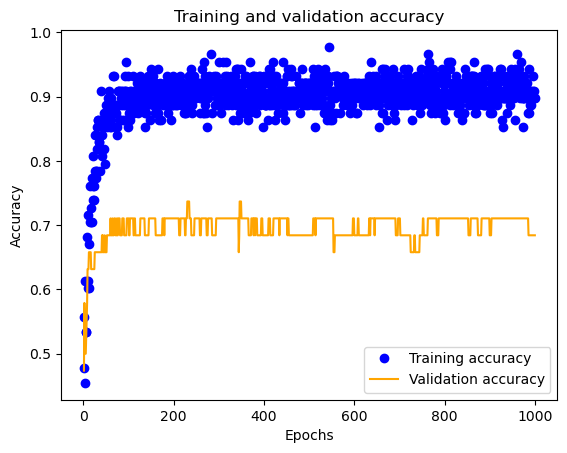

In [9]:
# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Maximum accuracy achieved on the training and validation set.

In [10]:
print('Max training accuracy: ', np.max(acc))
print('Max validation accuracy: ', np.max(val_acc))

Max training accuracy:  0.9772727489471436
Max validation accuracy:  0.7368420958518982


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(y, preds)

4/4 [==============================] - 0s 584us/step


array([[38, 19],
       [ 1, 68]])

In [12]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79        57
           1       0.78      0.99      0.87        69

    accuracy                           0.84       126
   macro avg       0.88      0.83      0.83       126
weighted avg       0.87      0.84      0.84       126

